<a href="https://colab.research.google.com/github/Inamul-Hassan/Android-Permission-Analysis/blob/main/Android_Permission_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Resume Projects/Datasets/Android_Permission.csv')

In [3]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu',
#  'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
#  'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired',
#   'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
#   'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
#   'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
#   'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
#    'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r',
#     'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 
#     'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
#     'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 
#     'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
#     'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
#     'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
#     'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r',
#      'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot',
#       'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
#       'jet', 'jet_r'

## Basic Exploration

In [4]:
data.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fo

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Columns: 184 entries, App to Class
dtypes: float64(3), int64(176), object(5)
memory usage: 42.1+ MB


Rows - 29,999 

Columns - 184

In [6]:
data.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.0,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,...,

In [7]:
data.isna().sum()

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64

## Exploratory Data Analysis

#### General

In [8]:
sns.set_style('darkgrid')

In [9]:
data.iloc[:,:10]

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0


In [10]:
cols = ['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count', 'Class']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


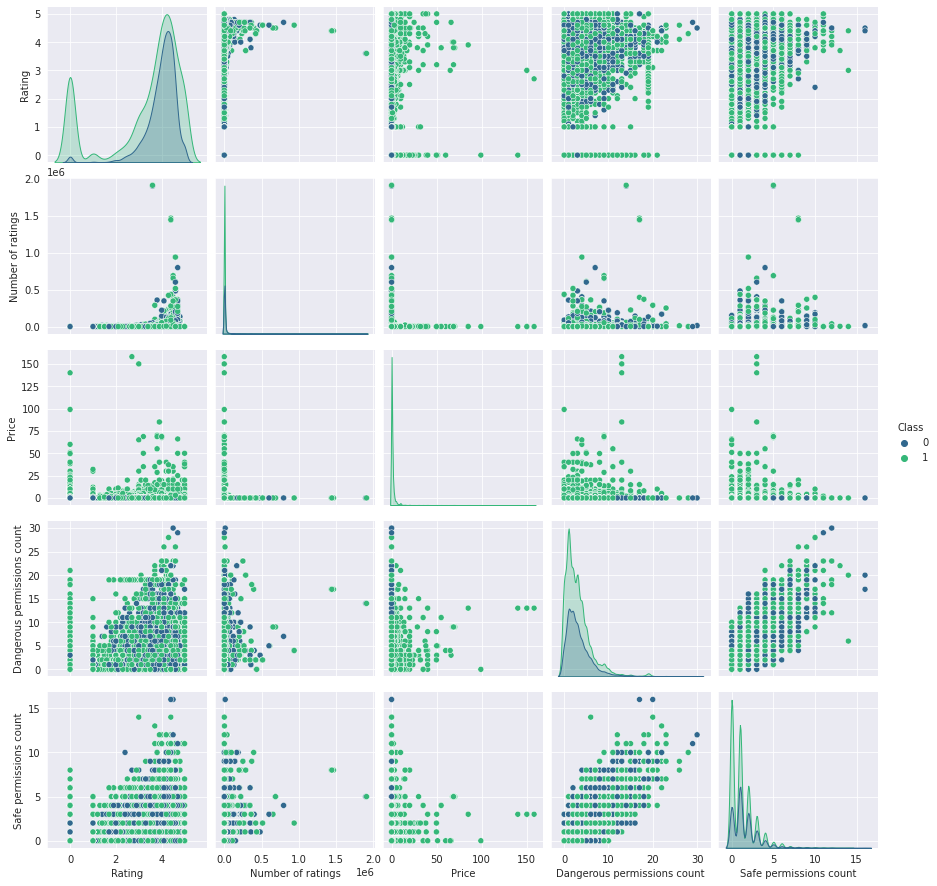

In [11]:
sns.pairplot(data[['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count', 'Class']],hue='Class',palette='viridis')

In [12]:
data[cols].corr()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Class
Rating,1.000000,0.086709,-0.135572,0.096665,0.141102,-0.221996
Number of ratings,0.086709,1.000000,-0.026352,0.166119,0.185006,-0.036465
Price,-0.135572,-0.026352,1.000000,0.008842,-0.026476,0.137288
Dangerous permissions count,0.096665,0.166119,0.008842,1.000000,0.730692,-0.026194
Safe permissions count,0.141102,0.185006,-0.026476,0.730692,1.000000,-0.086361
Class,-0.221996,-0.036465,0.137288,-0.026194,-0.086361,1.000000


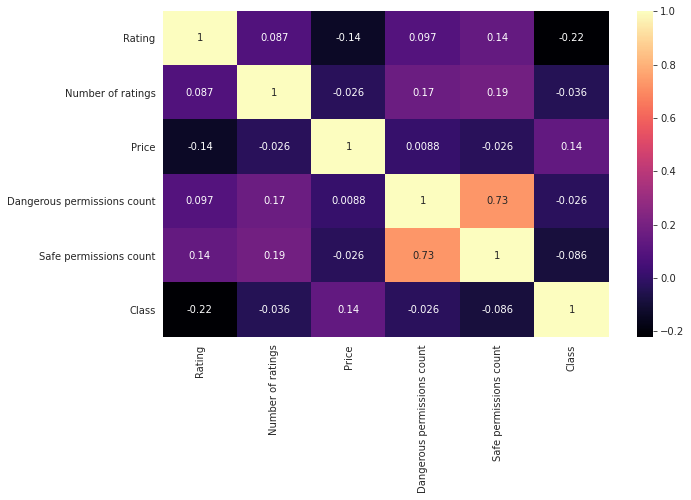

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data[cols].corr(),annot=True,cmap='magma')

Lets Explore More on specific features.

#### Class

In [14]:
data['Class'].value_counts()

1    20000
0     9999
Name: Class, dtype: int64

**Classes**

0 - Benign

1 - Malware



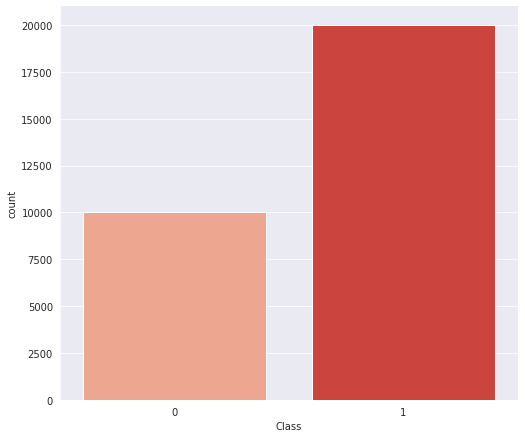

In [15]:
sns.catplot(data=data,x='Class',kind='count',height=6, aspect=1.2,palette='Reds')


#### Category	

In [16]:
indexOrder = data['Category'].value_counts().index

In [17]:
indexOrder


Index(['Entertainment', 'Travel & Local', 'Arcade & Action',
       'Books & Reference', 'Brain & Puzzle', 'Casual', 'Personalization',
       'Lifestyle', 'Tools', 'Education', 'Communication', 'Finance',
       'Health & Fitness', 'Business', 'Cards & Casino', 'Media & Video',
       'Productivity', 'Sports', 'Libraries & Demo', 'Comics', 'Music & Audio',
       'News & Magazines', 'Transportation', 'Shopping', 'Social',
       'Sports Games', 'Photography', 'Racing', 'Medical', 'Weather'],
      dtype='object')

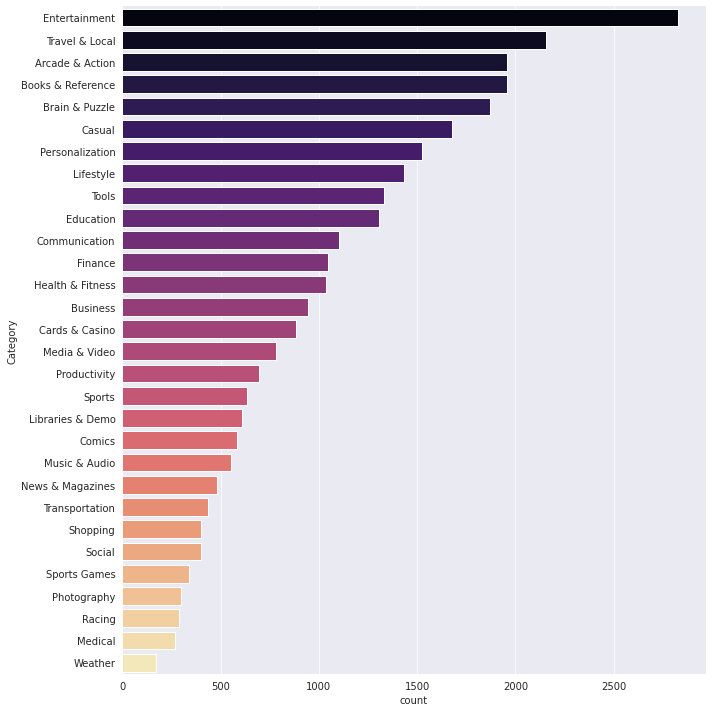

In [18]:
sns.catplot(data=data,y='Category',kind='count',height=10, aspect=1,order=indexOrder,palette='magma')
plt.tight_layout()

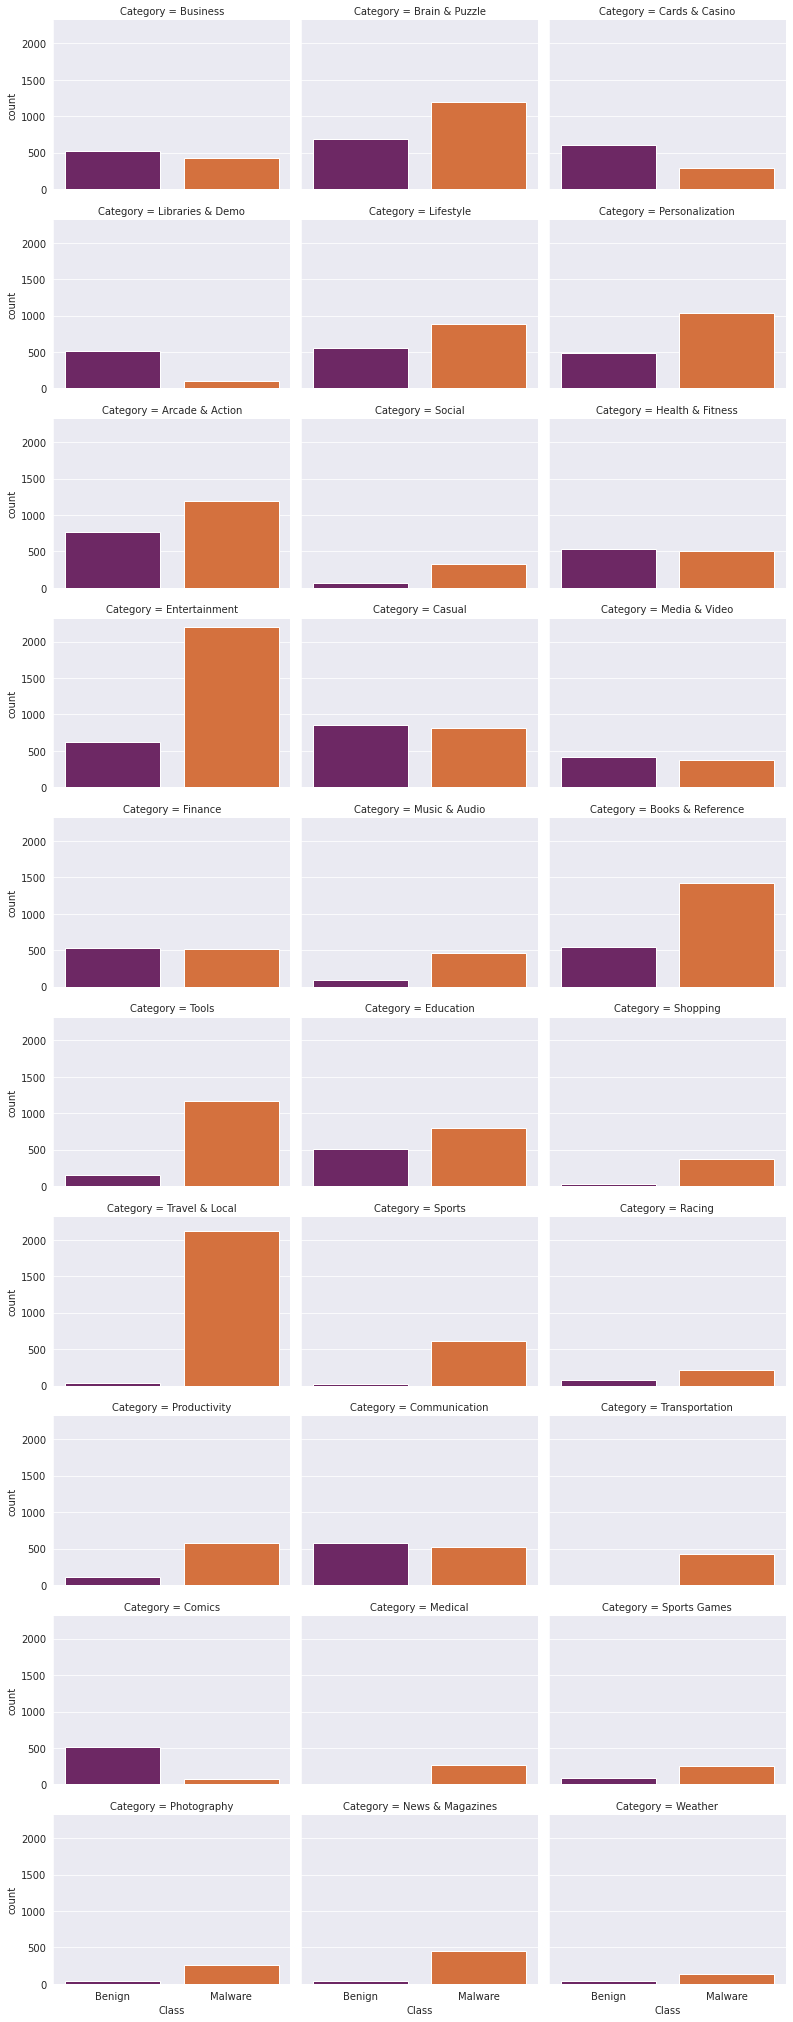

In [20]:
f = sns.catplot(x="Class", col="Category", col_wrap=3,
                data=data,palette='inferno',
                kind="count", height=2.8, aspect=1.3)

f.set_xticklabels(['Benign','Malware'])

In [21]:
colorMap = sns.color_palette("YlOrBr", as_cmap=True)
x= data.pivot_table(index='Category',columns='Class',values='App',aggfunc='count').sort_values(by=1,ascending = False)


.style.background_gradient(cmap=colorMap)

In [22]:
x.style.background_gradient(cmap=colorMap)

Class,0,1
Category,,
Entertainment,623,2204
Travel & Local,33,2121
Books & Reference,538,1421
Brain & Puzzle,682,1191
Arcade & Action,769,1190
Tools,154,1175
Personalization,491,1035
Lifestyle,554,881
Casual,860,818


#### Price Of Apps

In [23]:
data['Price'].describe()

count    29999.000000
mean         0.625707
std          3.222620
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        158.070000
Name: Price, dtype: float64

In [24]:
data['Price'].value_counts()

0.00     24322
0.99      1690
1.99       609
2.99       414
4.99       215
         ...  
49.95        1
4.32         1
51.00        1
2.42         1
3.96         1
Name: Price, Length: 425, dtype: int64

In [25]:
data['PaidOrFree'] = data['Price'].apply(lambda x : True if x > 0 else False)

In [26]:
data.loc[data['PaidOrFree'] == False,'PaidOrFree' ] = 'Free'

In [27]:
data.loc[data['PaidOrFree'] == True,'PaidOrFree' ] = 'Paid'

Almost 25k apps out of 30k are free. 

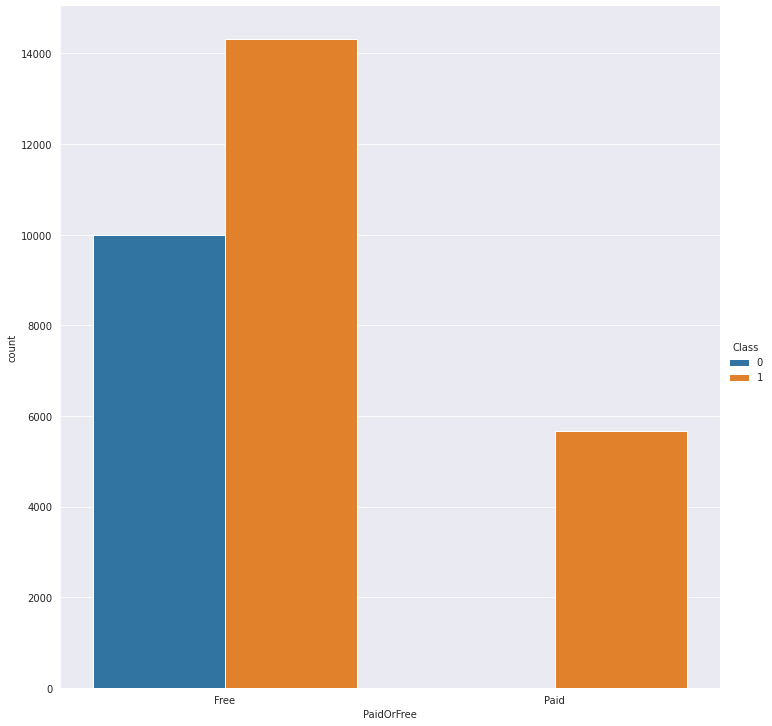

In [28]:
sns.catplot(data=data,x='PaidOrFree',kind='count',height=10, aspect=1,hue='Class')


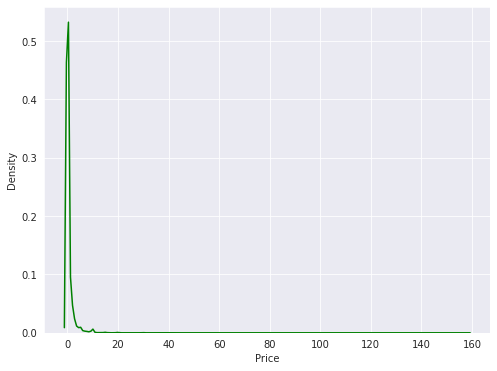

In [29]:
plt.figure(figsize=(8,6))
sns.kdeplot(data['Price'],color='green')

Price distribution is left skewed, have to standardize before modeling

#### Safe permissions count

In [30]:
data['Safe permissions count'].value_counts()

0     9894
1     9826
2     5201
3     2650
4     1227
5      513
6      326
7      150
8       85
9       56
10      35
11      18
12      13
14       2
16       2
13       1
Name: Safe permissions count, dtype: int64

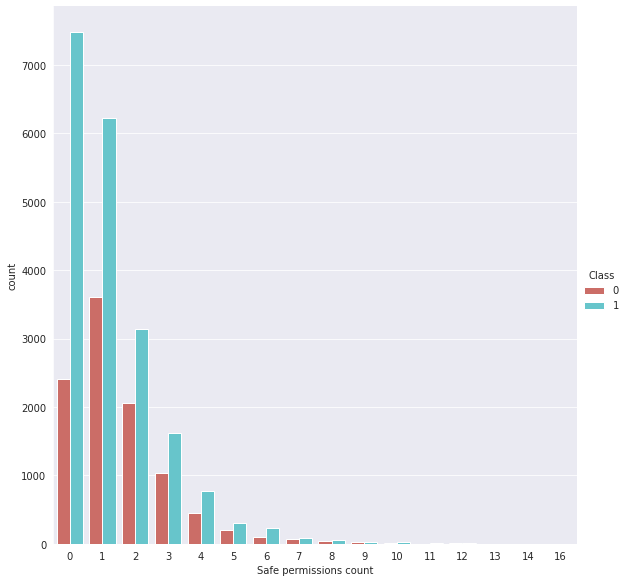

In [31]:
sns.catplot(data=data,x='Safe permissions count',kind='count',height=8, aspect=1,hue='Class',palette='hls')


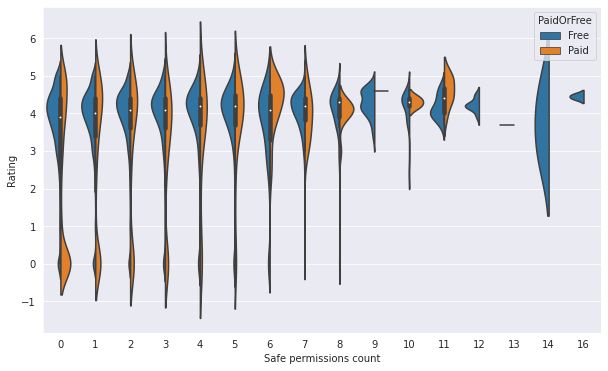

In [32]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data,x='Safe permissions count',y='Rating',hue='PaidOrFree',split = True)

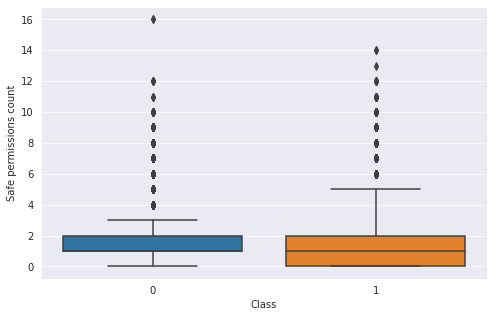

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = data, x = 'Class', y = 'Safe permissions count')

#### Dangerous permissions count

In [34]:
data['Dangerous permissions count'].value_counts()

1.0     6569
2.0     5015
3.0     4573
0.0     3822
4.0     3234
5.0     2164
6.0     1384
7.0      815
9.0      538
8.0      517
10.0     329
11.0     173
12.0     121
19.0     110
13.0     109
15.0      88
14.0      59
18.0      39
17.0      35
16.0      32
20.0      22
23.0      20
22.0      12
21.0       8
30.0       2
28.0       2
26.0       2
29.0       1
Name: Dangerous permissions count, dtype: int64

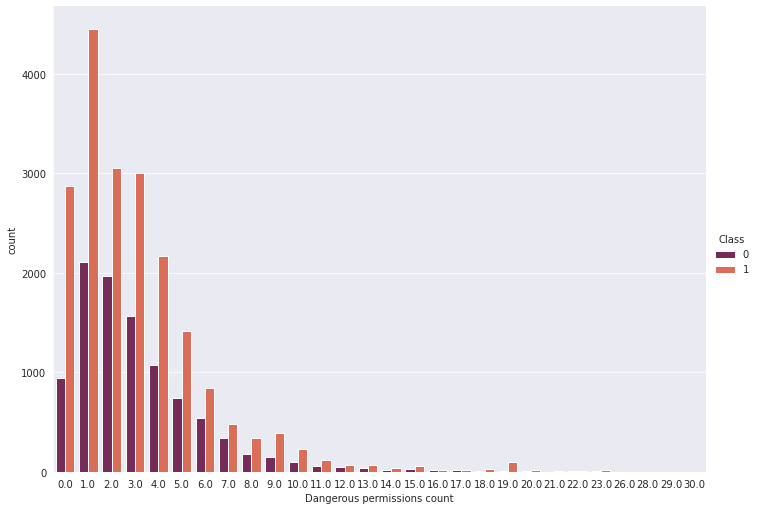

In [35]:
sns.catplot(data=data,x='Dangerous permissions count',kind='count',height=7, aspect=1.4,hue='Class',palette='rocket')

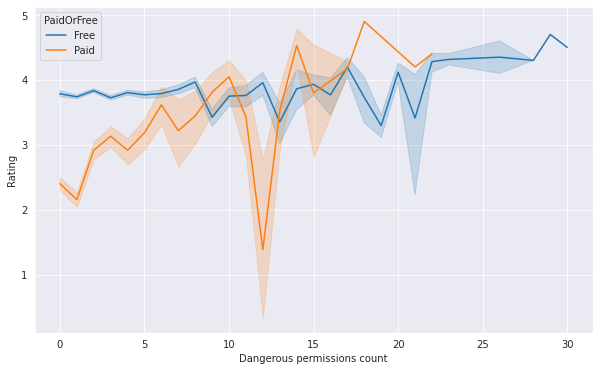

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x='Dangerous permissions count',y='Rating',hue='PaidOrFree')

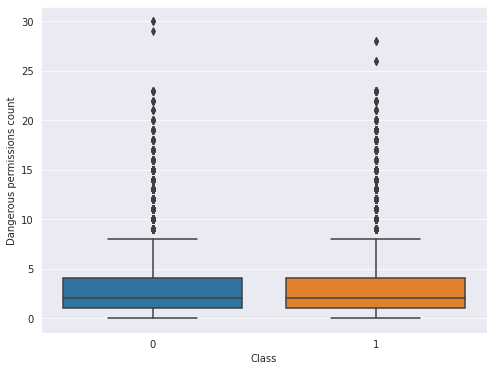

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = data, x = 'Class', y = 'Dangerous permissions count')

## Preprocessing

### Missing data

In [38]:
data.dropna(axis=0,inplace=True)

### Removing columns with text data


In [39]:
data.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class,PaidOrFree
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.0,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,Free
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.0,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Free
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"F

In [40]:
data.drop(['Package','Description','Related apps','PaidOrFree'],inplace= True,axis=1)

In [42]:
# Reseting Index
data.reset_index(drop=True,inplace=True)

### Label Encoding of category column

In [43]:
data['Category']

0                Business
1          Brain & Puzzle
2          Cards & Casino
3        Libraries & Demo
4         Personalization
               ...       
29235      Travel & Local
29236     Arcade & Action
29237               Tools
29238      Travel & Local
29239      Brain & Puzzle
Name: Category, Length: 29240, dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
encoder = LabelEncoder()

data['Category'] = encoder.fit_transform(data['Category'])

In [46]:
data['Category']

0         3
1         2
2         4
3        12
4        18
         ..
29235    28
29236     0
29237    26
29238    28
29239     2
Name: Category, Length: 29240, dtype: int64

### Scaling Data

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop(['App','Class'], axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.2, random_state = 101)

In [49]:
ct = ColumnTransformer([('st', StandardScaler(), ['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count'])], remainder='passthrough')
ct.fit(X_train)
X_train_sc = ct.transform(X_train)
X_test_sc = ct.transform(X_test)

## Modeling

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [51]:
rc = RidgeClassifier(alpha = 0, class_weight=None, solver = 'cholesky')
rc.fit(X_train_sc, y_train)

RidgeClassifier(alpha=0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='cholesky', tol=0.001)

In [52]:
y_pred_rc = rc.predict(X_test_sc)

In [54]:
print(classification_report(y_test, y_pred_rc))

              precision    recall  f1-score   support

           0       0.59      0.35      0.44      1982
           1       0.72      0.87      0.79      3866

    accuracy                           0.70      5848
   macro avg       0.65      0.61      0.61      5848
weighted avg       0.68      0.70      0.67      5848



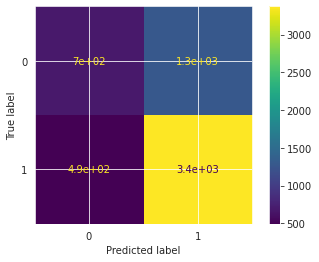

In [55]:
plot_confusion_matrix(rc, X_test_sc, y_test)

In [56]:
ls = LinearSVC(dual = False, C = 0.6)
ls.fit(X_train_sc, y_train)

LinearSVC(C=0.6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [57]:
y_pred_ls = ls.predict(X_test_sc)

In [58]:
print(classification_report(y_test, y_pred_ls))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      1982
           1       0.77      0.81      0.79      3866

    accuracy                           0.71      5848
   macro avg       0.67      0.66      0.67      5848
weighted avg       0.70      0.71      0.71      5848



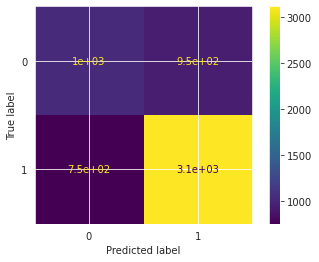

In [59]:
plot_confusion_matrix(ls, X_test_sc, y_test)

In [60]:
rc = RandomForestClassifier(n_estimators=200)
rc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_pred_rc = rc.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred_rc))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1982
           1       0.85      0.85      0.85      3866

    accuracy                           0.80      5848
   macro avg       0.78      0.78      0.78      5848
weighted avg       0.80      0.80      0.80      5848



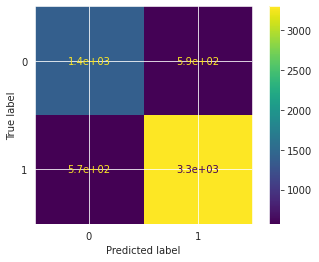

In [63]:
plot_confusion_matrix(rc, X_test, y_test)

In [64]:
gc = GradientBoostingClassifier(max_depth = 4, n_estimators = 200)
gc.fit(X_train, y_train)
y_pred_gc = gc.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred_gc))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1982
           1       0.88      0.83      0.86      3866

    accuracy                           0.82      5848
   macro avg       0.79      0.81      0.80      5848
weighted avg       0.82      0.82      0.82      5848



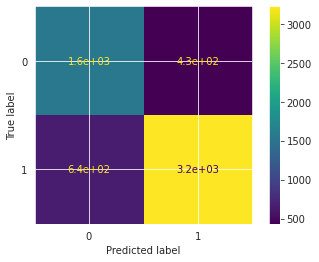

In [66]:
plot_confusion_matrix(gc, X_test, y_test)